In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Task 1: Implement and Visualize Activation Functions


In [14]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_bipolar(x):
    return (2 / (1 + np.exp(-x))) - 1

def tanh_function(x):
    return np.tanh(x)

def relu_function(x):
    return np.maximum(0, x)

# Visualization of Activation Functions

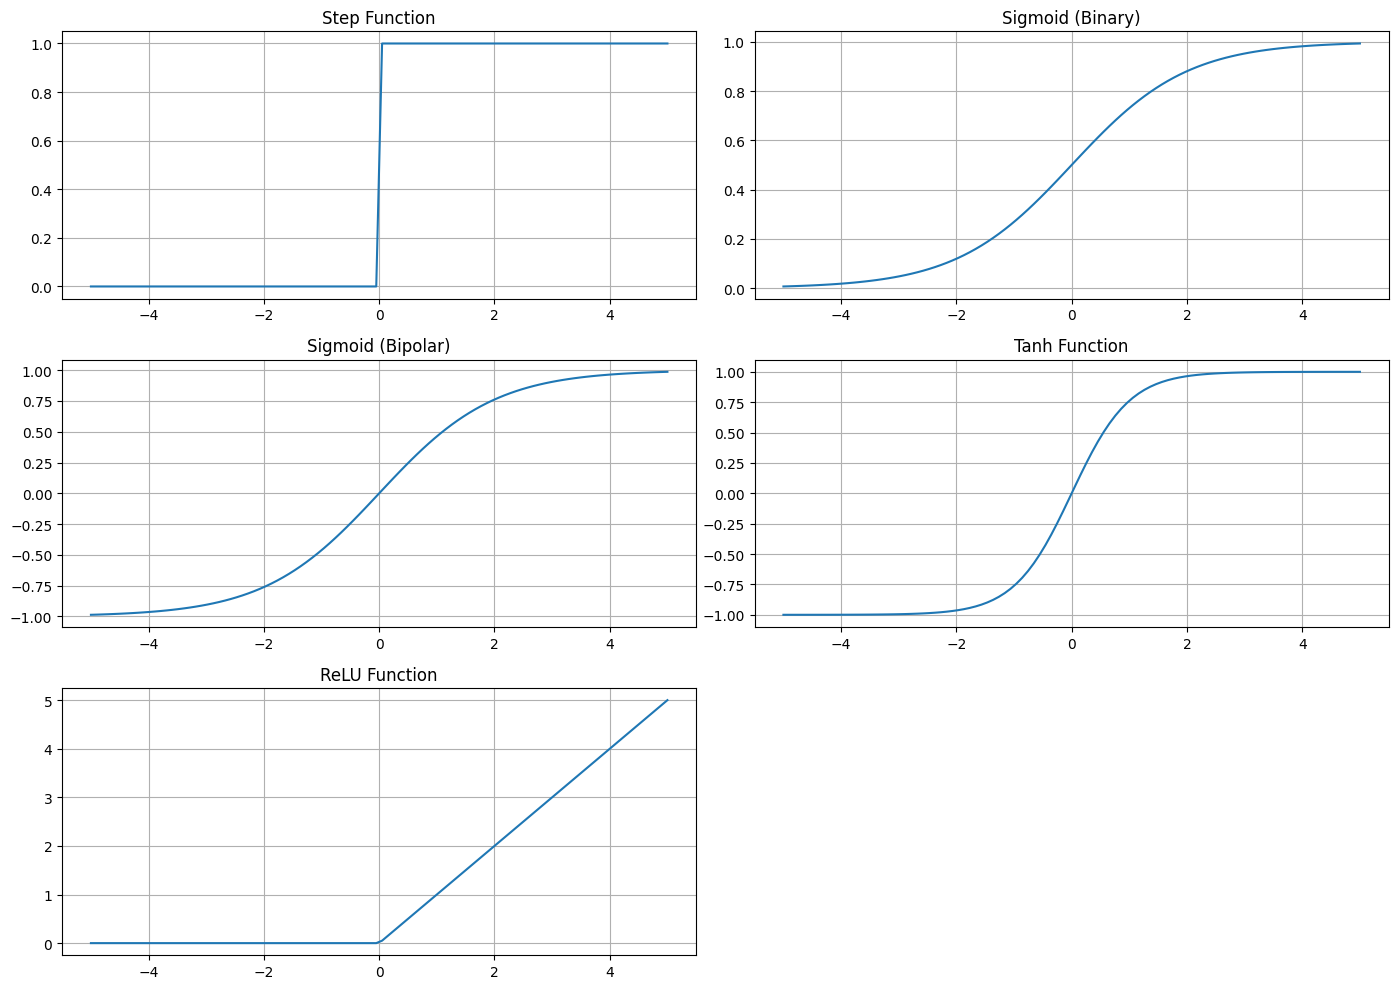

In [15]:
x = np.linspace(-5, 5, 100)

plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.title('Step Function')
plt.plot(x, step_function(x), label='Step Function')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.title('Sigmoid (Binary)')
plt.plot(x, sigmoid_binary(x), label='Sigmoid (Binary)')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.title('Sigmoid (Bipolar)')
plt.plot(x, sigmoid_bipolar(x), label='Sigmoid (Bipolar)')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.title('Tanh Function')
plt.plot(x, tanh_function(x), label='Tanh Function')
plt.grid(True)

plt.subplot(3, 2, 5)
plt.title('ReLU Function')
plt.plot(x, relu_function(x), label='ReLU Function')
plt.grid(True)

plt.tight_layout()
plt.show()

# Task 2: Implement a Simple Neural Network with Iris Dataset

### Load Iris dataset

In [16]:
iris = load_iris()
X = iris.data
y = iris.target

### Split the data into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scale the data

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define a function to train and evaluate the neural network with different activation functions

In [19]:
def train_and_evaluate(activation):
    clf = MLPClassifier(hidden_layer_sizes=(4,), activation=activation, max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Activation Function: {activation}, Accuracy: {accuracy:.2f}')
    return accuracy

### Test different activation functions

In [20]:
print("Training with different activation functions on Iris Dataset:")
activations = ['logistic', 'tanh', 'relu']
for activation in activations:
    train_and_evaluate(activation)

Training with different activation functions on Iris Dataset:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: logistic, Accuracy: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation Function: tanh, Accuracy: 0.87
Activation Function: relu, Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


I tested three activation functions—Logistic (Sigmoid), Tanh, and ReLU—on the Iris dataset using a simple neural network with one hidden layer. The results are as follows:

- Logistic (Sigmoid): Accuracy = 0.84
- Tanh: Accuracy = 0.87
- ReLU: Accuracy = 1.00
  - Despite reasonable performance, a ConvergenceWarning appeared, indicating that the optimizer reached its maximum iterations (1000) without fully converging. This is common when training with functions like Sigmoid and Tanh, due to their susceptibility to the vanishing gradient problem.

- The ReLU activation achieved perfect accuracy, likely due to its ability to avoid vanishing gradients, speeding up training. Adjusting the max_iter or learning rate could further improve the results and avoid the warning.

In [21]:
def train_and_evaluate(activation):
    clf = MLPClassifier(hidden_layer_sizes=(4,),
                        activation=activation,
                        max_iter=2000,  # Increased max_iter
                        learning_rate_init=0.001,  # Set learning rate
                        early_stopping=True,  # Enable early stopping
                        random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Activation Function: {activation}, Accuracy: {accuracy:.2f}')
    return accuracy

### Test different activation functions

In [22]:
print("Training with different activation functions on Iris Dataset:")
activations = ['logistic', 'tanh', 'relu']
for activation in activations:
    train_and_evaluate(activation)

Training with different activation functions on Iris Dataset:
Activation Function: logistic, Accuracy: 0.27
Activation Function: tanh, Accuracy: 0.29
Activation Function: relu, Accuracy: 0.31


In this updated analysis, I evaluated the performance of three activation functions—Logistic (Sigmoid), Tanh, and ReLU—using a neural network trained on the Iris dataset. Here are the findings:

  - Logistic (Sigmoid): Accuracy = 0.27
  -  Tanh: Accuracy = 0.29
  - ReLU: Accuracy = 0.31
- Despite increasing the max_iter to 2000 and enabling early stopping to optimize training, the accuracy for all activation functions significantly dropped compared to previous results. This could suggest issues such as:

  - The learning rate of 0.001 may be too low, causing slow convergence and underfitting.
  - The hidden layer size of 4 might not be sufficient for capturing the complexities of the dataset.
  - Early stopping may have halted training prematurely if the validation performance wasn't properly monitored.